In [1]:
# Import Libraries

# 1. Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pre-Processing Libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Modelling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Testing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

print("Libraries Imported")

Libraries Imported


## Loading Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Data Loaded Successfully")

Data Loaded Successfully


## Some Info About the Data

In [3]:
# First 5 rows of dataset
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# Get some info on our dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Observation**
* There are a total of 8693 entries/data-points
* There are 14 columns, and 13 feature columns and one target variable `Transported`
* Our dataset has 3 datatypes
    * 6 Float Values
    * 7 Objects/String
    * 1 Bool (This is the target variable, we'll convert this to 0's & 1's)


In [5]:
# Some description of the numeric columns
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Observation**

* Age Column
    * Ages start from 0 and go till 79
    * 75% poeple are less than the age of `38`
    
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
    * The most poeple were billed at the FoodCourt
    * The cheapest luxury was the Room Service, which is pretty obvious why
    * These columns DON'T contradict with our common sense, so they are pretty good at they are
    
  

In [6]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

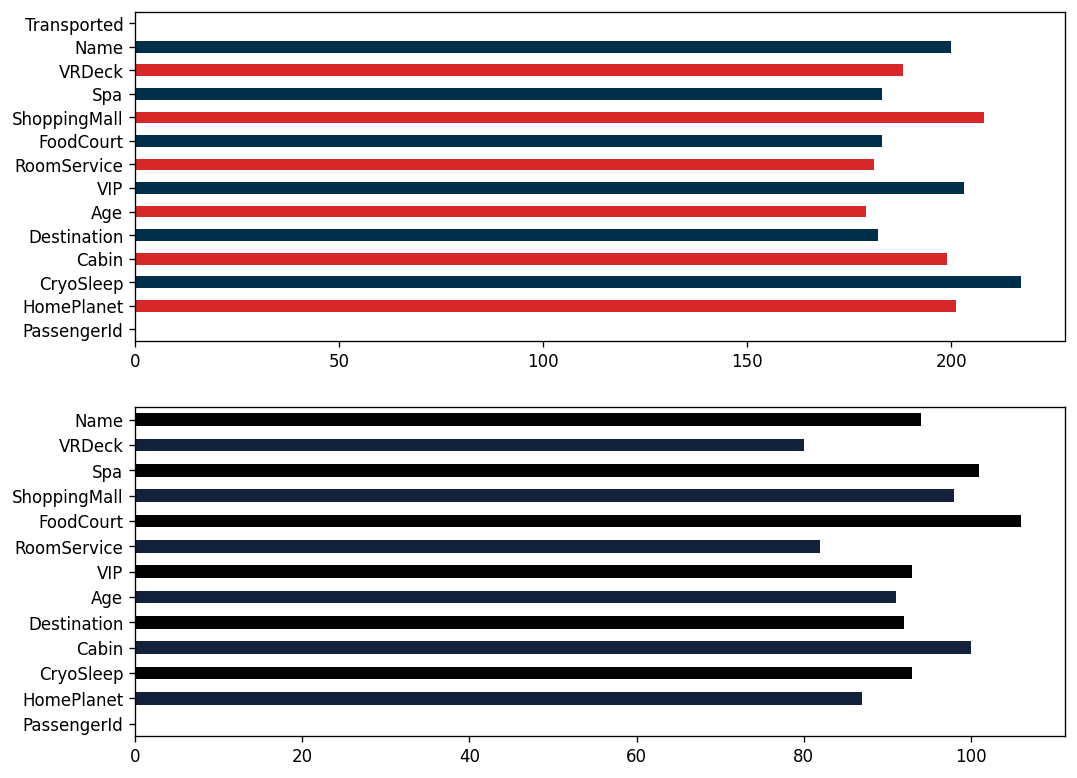

In [7]:
# Check for Null values
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=120)
train_df.isna().sum().plot(kind="barh", color=["#003049", "#d62828"], ax=ax[0]) # Train
test_df.isna().sum().plot(kind="barh", color=["#000000", "#14213d"], ax=ax[1])  # Test
plt.show()

## Doing Some EDA
* Exploring the numeric features (Histrograms)
* Exploring the categroical columns (Bar Charts, Scatter Plots)
* Exploring the relation of columns to getting Transported or NOT

### Exploring numeric features

In [8]:
# 1. What are the numeric columns
train_df.select_dtypes("Float64").columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [9]:
# 2. Let's plot the distribution of Age
px.histogram(data_frame = train_df, x="Age")

In [10]:
# 3. Let's plot the distribution of the Room Service Bills
px.histogram(data_frame = train_df, x="RoomService")

In [11]:
# 4. Let's plot the distribution of the  Bills
px.histogram(data_frame = train_df, x="FoodCourt")

In [12]:
# 5. Distribution of Shopping Mall Bills
px.histogram(data_frame = train_df, x="ShoppingMall")

In [13]:
# 6. Distribution of Spa Bills
px.histogram(data_frame = train_df, x="Spa")

In [14]:
# 7. Distribution of VRDeck Bills
px.histogram(data_frame = train_df, x="VRDeck")

**Observation**

The simple truth is that poeple didn't spend a lot of money on luxuries...as probably the ticket of the flight itself might be very expesive.

Also could be that most travellers were middle class and couldn't afford to spend a lot.

This could be another inference that many of these things like Room Service, Food Courts were already provided in decent quantity that passengers didn't have to spend thier own money (Something like packages included with the ticket).

### Exploring the Categorical Columns

In [15]:
# 1. What are the categorical columns?
train_df.select_dtypes("O").columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [16]:
def plot_value_counts(column_name):
    """
    Pass in the Categorical column name and this function will plot the value counts
    
    **Parameters**
        * column_name: Categorical Column Name
    """
    
    plt.figure(figsize=(8, 5), dpi=120)
    train_df[column_name].value_counts().plot(kind="bar", color=["#52796f", "#354f52"]).set(
    title=f"Value Counts of the {column_name} Column")
    plt.xticks(rotation=0)
    plt.show()

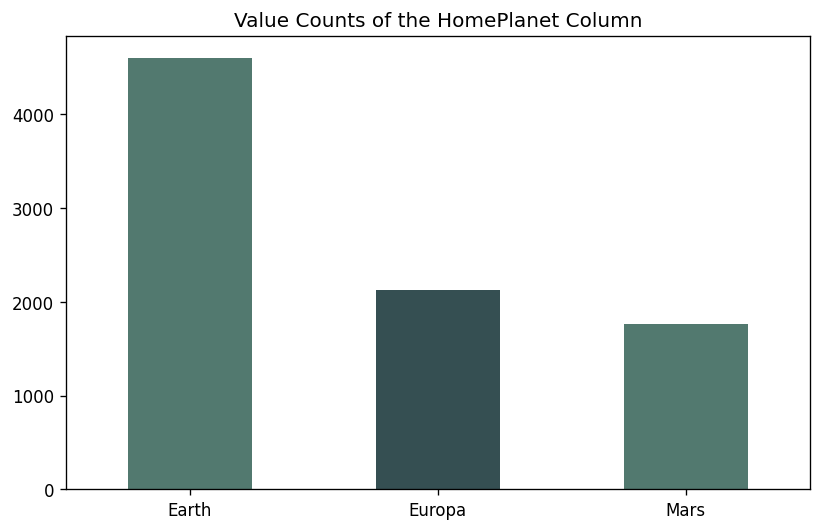

In [17]:
# 2. Value Counts of the Planet Column
plot_value_counts("HomePlanet")

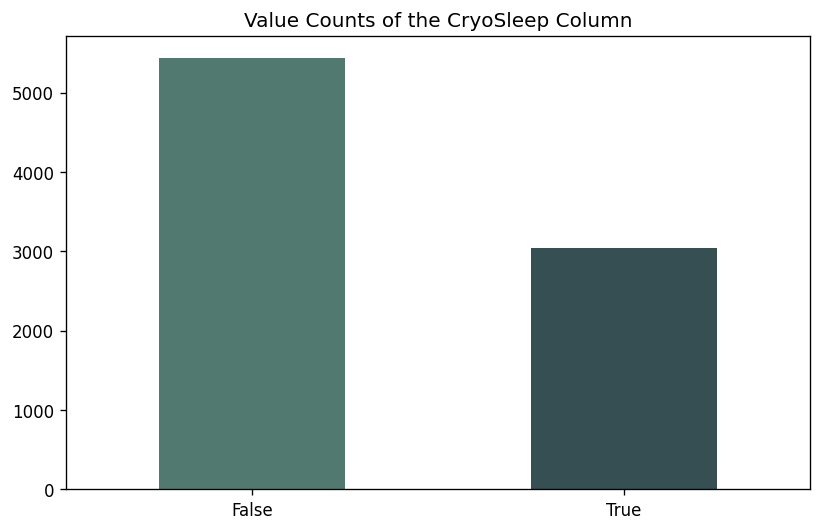

In [18]:
# 3. Value Counts of the CryoSleep Column
plot_value_counts("CryoSleep")

**Obeservation**

* Around 3200 poeple were confined in Cabins
* And around 5500 were clear, no confinement


I bet those who got confined prolly went mad and did something utterly stupid, which causes them imprisonment in thier OWN cabins...How funny is that!

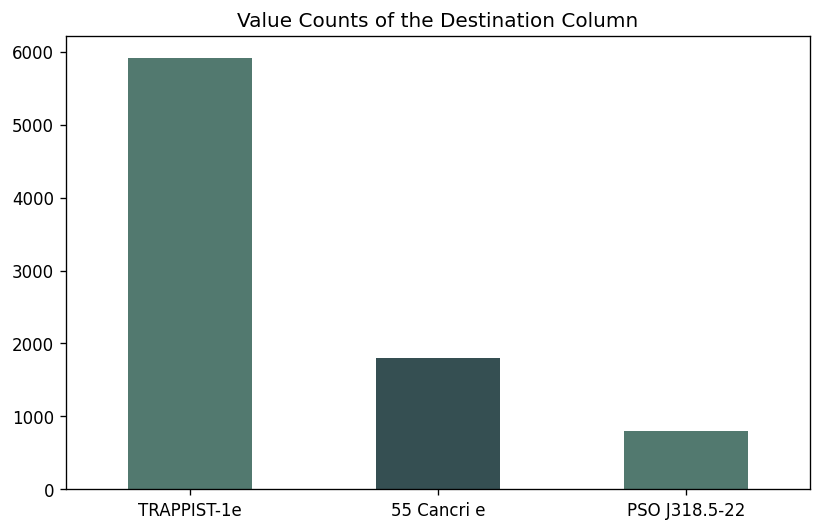

In [19]:
# 4. Value Counts of the Destination Column
plot_value_counts("Destination")

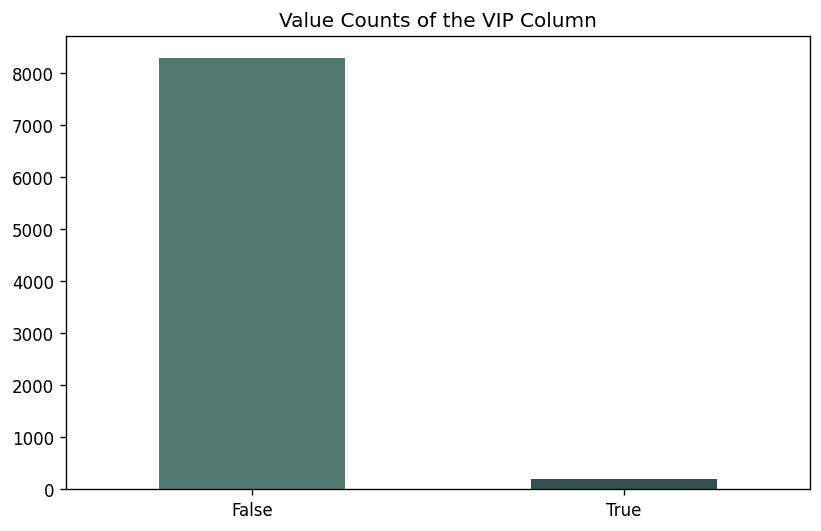

In [20]:
# 4. Value Counts of the VIP Column
plot_value_counts("VIP")

### Relation of columns to Transported

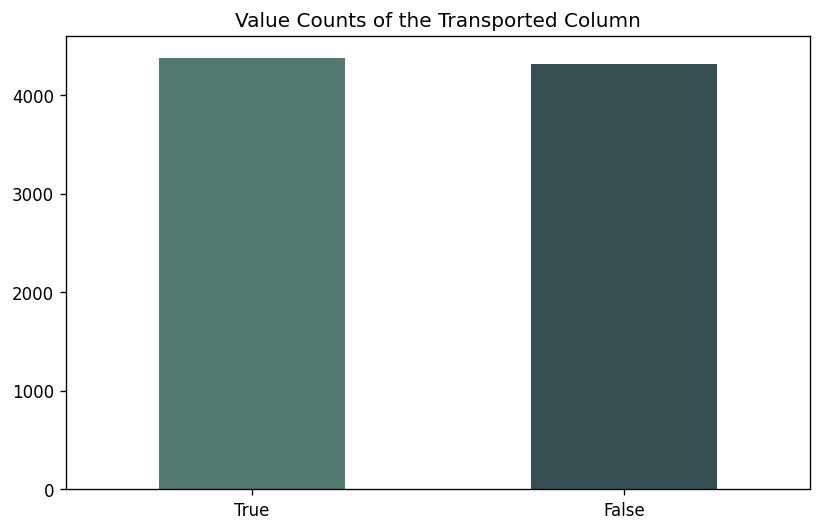

In [21]:
# Value Counts of the Transported Column
plot_value_counts("Transported")

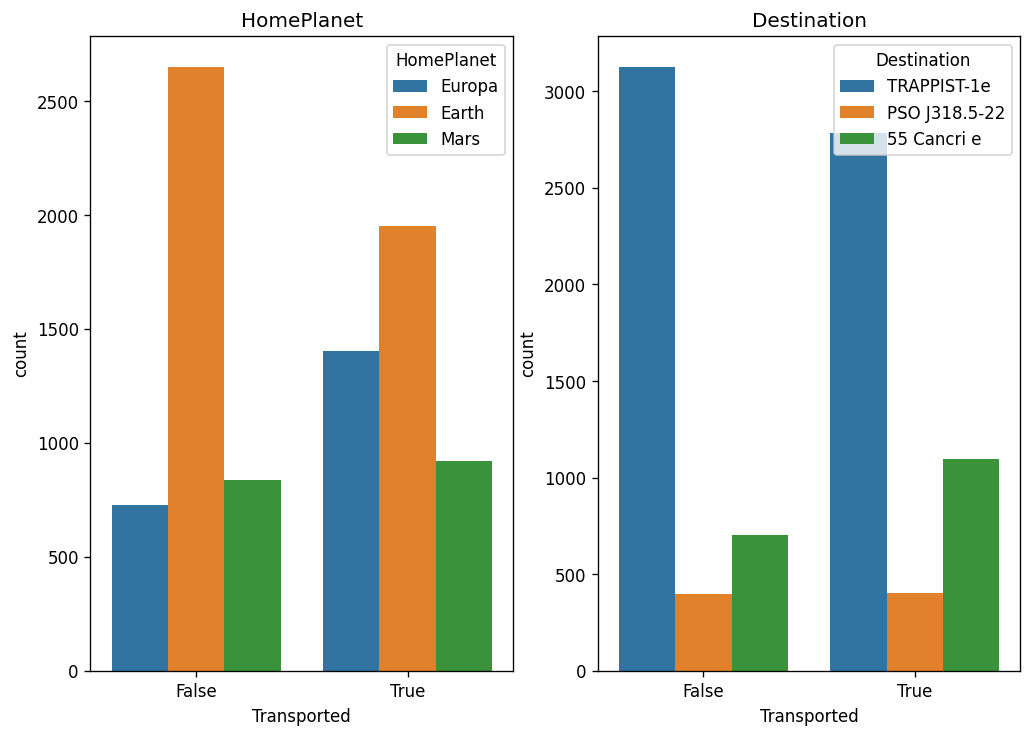

In [22]:
# Question: What is the realation of HomePlanet & Destination with Transported
fig, ax = plt.subplots(1, 2, figsize=(10, 7), dpi=120)
sns.countplot(x=train_df["Transported"], hue=train_df["HomePlanet"], ax=ax[0]).set(title="HomePlanet")
sns.countplot(x=train_df["Transported"], hue=train_df["Destination"]).set(title="Destination")
plt.show()

In [23]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

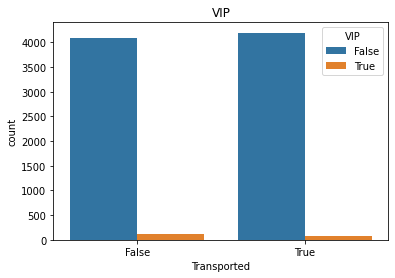

In [24]:
sns.countplot(x=train_df["Transported"], hue=train_df["VIP"]).set(title="VIP")
plt.show()

In [25]:
temp_df = train_df.copy()
test_df_copy = test_df.copy()
temp_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [26]:
# What are the numeric columns, and their sum of missing values
temp_df.select_dtypes("float").isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [27]:
# Checking for most frequent values (OBJECT)
temp_df.select_dtypes("float").mode()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,24.0,0.0,0.0,0.0,0.0,0.0


In [28]:
imputer_startegy = SimpleImputer(strategy='most_frequent')
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
object_features = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP','Name']

In [29]:
imputer = ColumnTransformer([
    ("num_imputer", imputer_startegy, numerical_features),
    ("object_imputer", imputer_startegy, object_features),
])

# Fill train and test values separately
temp_df = imputer.fit_transform(temp_df)
test_df_copy = imputer.fit_transform(test_df)

# Create the DataFrame
temp_df = pd.DataFrame(temp_df, columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
                                         'Spa', 'VRDeck', 'PassengerId', 'HomePlanet', 'CryoSleep', 
                                         'Cabin', 'Destination', 'VIP','Name'])

test_df_copy = pd.DataFrame(test_df_copy, columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
                                         'Spa', 'VRDeck', 'PassengerId', 'HomePlanet', 'CryoSleep', 
                                         'Cabin', 'Destination', 'VIP','Name'])

In [30]:
# Check for NULL values - NO null(s)
test_df_copy.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
dtype: int64

In [31]:
# As Transported column was removed, let's add it back.
transported = train_df.Transported
temp_df['Transported'] = transported
temp_df.head()

# No need for the test set, as there is NO target column

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,24.0,109.0,9.0,25.0,549.0,44.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,16.0,303.0,70.0,151.0,565.0,2.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True


### 2. Feature Engineering

Just one thing needs to be done, that is to make the **Starboard** and **Pilot** thing. Should just take a minute.

In [32]:
temp_df.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [33]:
# Re-Arranging columns to their orignal format
temp_df = temp_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']]

In [34]:
# Get the value counts of the P (Pilot Spot)
temp_df.Cabin.str.contains("P").value_counts()

False    4487
True     4206
Name: Cabin, dtype: int64

In [35]:
# Make a column **SPOT** per condition
temp_df.loc[temp_df["Cabin"].str.contains("P"), 'Spot'] = "Pilot" if True else "StarBoard"
temp_df.loc[temp_df["Cabin"].str.contains("S"), 'Spot'] = "StarBoard" if True else "Pilot"

# Testing Set
test_df_copy.loc[temp_df["Cabin"].str.contains("P"), 'Spot'] = "Pilot" if True else "StarBoard"
test_df_copy.loc[temp_df["Cabin"].str.contains("S"), 'Spot'] = "StarBoard" if True else "Pilot"

In [36]:
# Let's remove some un-necessary columns like Name and Cabin
temp_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
test_df_copy.drop(['Name', 'Cabin'], axis=1, inplace=True)

### 3. OneHotEncoding

One last thing before we can move to the ML section is to covert our string/categorical columns to numbers, as it is required. You CANNOT pass string values into an ML algorithm. So let's get to it!

In [37]:
num_cols = train_df.select_dtypes("float").columns
num_cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [38]:
# Converting numeric columns to float
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in num_cols:
    temp_df[col] = temp_df[col].astype("float64") # Traning Set
    test_df_copy[col] = test_df_copy[col].astype("float64") # Test Set

In [39]:
test_df_copy

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Spot
0,27.0,0.0,0.0,0.0,0.0,0.0,0013_01,Earth,True,TRAPPIST-1e,False,Pilot
1,19.0,0.0,9.0,0.0,2823.0,0.0,0018_01,Earth,False,TRAPPIST-1e,False,StarBoard
2,31.0,0.0,0.0,0.0,0.0,0.0,0019_01,Europa,True,55 Cancri e,False,StarBoard
3,38.0,0.0,6652.0,0.0,181.0,585.0,0021_01,Europa,False,TRAPPIST-1e,False,StarBoard
4,20.0,10.0,0.0,635.0,0.0,0.0,0023_01,Earth,False,TRAPPIST-1e,False,StarBoard
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,9266_02,Earth,True,TRAPPIST-1e,False,StarBoard
4273,42.0,0.0,847.0,17.0,10.0,144.0,9269_01,Earth,False,TRAPPIST-1e,False,StarBoard
4274,18.0,0.0,0.0,0.0,0.0,0.0,9271_01,Mars,True,55 Cancri e,False,Pilot
4275,18.0,0.0,2680.0,0.0,0.0,523.0,9273_01,Europa,False,TRAPPIST-1e,False,Pilot


In [40]:
# Creating some variables for easy use
categorical_cols = temp_df.select_dtypes('object').columns.tolist()
numeric_cols = temp_df.select_dtypes('float').columns.tolist()

# Init the encoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder
encoder.fit(temp_df.select_dtypes("object"))

# Get the Encoded column names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform both train and test sets.
temp_df[encoded_cols] = encoder.transform(temp_df[categorical_cols])
test_df_copy[encoded_cols] = encoder.transform(test_df_copy[categorical_cols])

## Modelling - Machine Learning

We'll try out different algorithms like
1. Logistic Regression
2. Naive Bayes
3. K-Nearest Neighbors
4. Decision Tree
5. Support Vector Machines



### Creating Train & Validation Sets
We'll take around 20% of the training set, and use it as the validation set. This is what we'll use to validate our model and tune our model, before we go the real predictions & submission to Kaggle.

In [41]:
temp_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Spot_Pilot,Spot_StarBoard
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
df_temp_train = temp_df[:6700]
df_temp_valid = temp_df[6700:]

In [43]:
temp_df.Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [44]:
temp_df.shape

(8693, 24)

In [45]:
X_train, y_train = temp_df.drop("Transported", axis=1), temp_df.Transported
# X_valid, y_valid = df_temp_valid.drop("Transported", axis=1), df_temp_valid.Transported

### Train models

In [46]:
modelclasses = [
    ["Logistic Regression", LogisticRegression],
    ["Decision Tree Classifier", DecisionTreeClassifier],
    ["Random Forest Classifier", RandomForestClassifier],
    ["K Neighbors Classifier", KNeighborsClassifier],
    ["Naive Bayes", GaussianNB],
    ["Support Vector Machines", SVC]
]

In [47]:
insights = []
for modelname, Model in modelclasses:
    model = Model()
    model.fit(X_train[numeric_cols + encoded_cols], y_train)
    score = model.score(X_train[numeric_cols + encoded_cols], y_train)        
    insights.append((modelname, score))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [48]:
insights.sort(key=lambda x:x[-1], reverse=True)
insights

pd.DataFrame(insights, columns=["Model Name", "Score"])

,Model Name,Score
0,Decision Tree Classifier,0.937651
1,Random Forest Classifier,0.937651
2,K Neighbors Classifier,0.829633
3,Logistic Regression,0.792017
4,Support Vector Machines,0.789831
5,Naive Bayes,0.738065


In [49]:
final_model = RandomForestClassifier().fit(X_train[numeric_cols + encoded_cols], y_train)
final_model.score(X_train[numeric_cols + encoded_cols], y_train)

0.9376509835499828

In [50]:
id_col = test_df.PassengerId
predictions = pd.Series(final_model.predict(test_df_copy[numeric_cols + encoded_cols]), name='Transported')

In [51]:
df=pd.concat([id_col, predictions], axis=1)

In [53]:
df.to_csv("RFC.csv", index=False)

And DONE! There we go, project SpaceShip Titanic is a go! The RandomForestClassifier, by far is the best model, which has the highest accuracy on Kaggle. PS. I tried em all!


